In [15]:
import os
if os.getcwd().endswith("Examples"):
    os.chdir('../')

from cdrift.approaches import earthmover
from cdrift import evaluation

from pm4py.objects.log.importer.xes import importer as xes_importer
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from pathlib import Path

# Timing
from timeit import default_timer
from datetime import datetime as dt

## Choose an Event Log ##

In [16]:
root = tk.Tk()
root.withdraw()
root.lift()

file_path = filedialog.askopenfilename(filetypes=[("XES Event Log","*.xes")])
print(f"Chosen Log: {Path(file_path).stem}")
log = xes_importer.apply(file_path)

Chosen Log: Atomic_Size2_SerialMove


parsing log, completed traces ::   0%|          | 0/2999 [00:00<?, ?it/s]

### Parameters / Constants ###

In [17]:
WINDOW_SIZE = 100
MEASURE_WINDOW = None
P_VALUE = 0.05
TRUE_CHANGEPOINTS = [999,1999]

#### Extract Time Series ####

In [18]:
start_time = default_timer()

traces = earthmover.extractTraces(log)

#### Detect Changes ####

In [19]:
em_dists = earthmover.calculateDistSeries(traces, WINDOW_SIZE)

calc_duration = default_timer() - start_time

calculating earthmover values, completed windows ::   0%|          | 0/2799 [00:00<?, ?it/s]

#### Visual Inspection ####

In [20]:
cp = earthmover.visualInspection(em_dists,trim=WINDOW_SIZE)
print(f"The EMD approach detected {cp}")

The EMD approach detected [938, 1938, 2525]


### Plotting ###

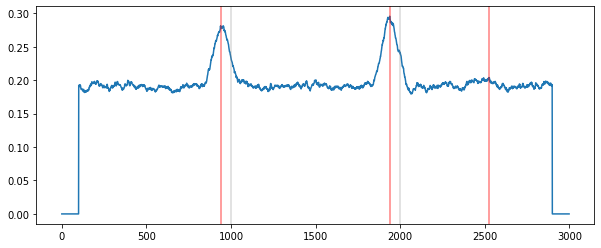

In [21]:
def plotPvals(sig, cp, known_cp):
    fig = plt.figure(figsize=(10,4))
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    for c in known_cp:
        plt.axvline(x=c, color="grey", alpha=0.3)
    plt.show()

plotPvals(em_dists,cp,TRUE_CHANGEPOINTS)

Note how sometimes (e.g., for the noiseless `Atomic_Size2_SerialMove` log ) a small bump (to the right) is also detected as a change point. If inspecting the signal manually, which is done in the paper, we would not make this mistake, but our peak-finding algorithm makes this mistake due the parameters used for peak-finding.

### Evaluation ###

In [22]:
f1 = evaluation.F1_Score(detected=cp, known=TRUE_CHANGEPOINTS, lag=200)

print(f"The EMD approach detected {cp} with an F1-Score of {f1}. This took {dt.strftime(dt.utcfromtimestamp(calc_duration), '%H:%M:%S')}.")
print(f"\nAverage Lag: {evaluation.get_avg_lag(detected_changepoints=cp, actual_changepoints=TRUE_CHANGEPOINTS, lag=200)} (Cases)")

The EMD approach detected [938, 1938, 2525] with an F1-Score of 0.8. This took 00:02:52.

Average Lag: 61.0 (Cases)
